**Opening to victory**  
Here I will try to find out what opener to use to win based on the amount of times an opener was used and won.  

**1 - Data preparation**  
I will use the python library <u>chess</u> to read and parse the data as it has many functionalities that make the busy work easier.  
I will also read from the eco_codes.csv to get the real names of the openers and not the codes.   
I will read throu the games and I will read that line in to a dict where it will be the code of the opener and, 0 - loss, 1 - win, 1/2 - draw  
each will acumulate as points for their respective opener, which i will then put on a bar chart.

In [1]:
import csv
import chess
import chess.pgn

# We Read eco_codes.csv to get a dict of ECO_code = ECO_name
ECO_names = {}
with open('data/eco_codes.csv', newline='') as csvFile:
    reader = csv.reader(csvFile)
    next(reader)  # We skip the first row
    for row in reader:
        ECO_names[row[0]] = row[1]  # row[0] is the ECO code, row[1] is the ECO name

# We read the games
games = {}
with open("data/Carlsen.pgn") as pgn:
    while True:
        game = chess.pgn.read_game(pgn)
        if game is None:
            break

        ECO_code = game.headers.get("ECO")
        ECO_name = ECO_names.get(ECO_code, "Unknown")  # If there is no ECO code, it will be set as unknown
        result_string = game.headers.get("Result")

        # Determine the game result
        game_result = 1.0 
        if result_string == "1-0":
            game_result = 1.0
        elif result_string == "0-1":
            game_result = 0
        elif result_string == "1/2-1/2":
            game_result = 0.5 
        else:
            None
        
        if ECO_name and game_result is not None:
            games[ECO_name] = games.get(ECO_name, 0) + game_result

ModuleNotFoundError: No module named 'chess'

**2 - Putting it on a graph**

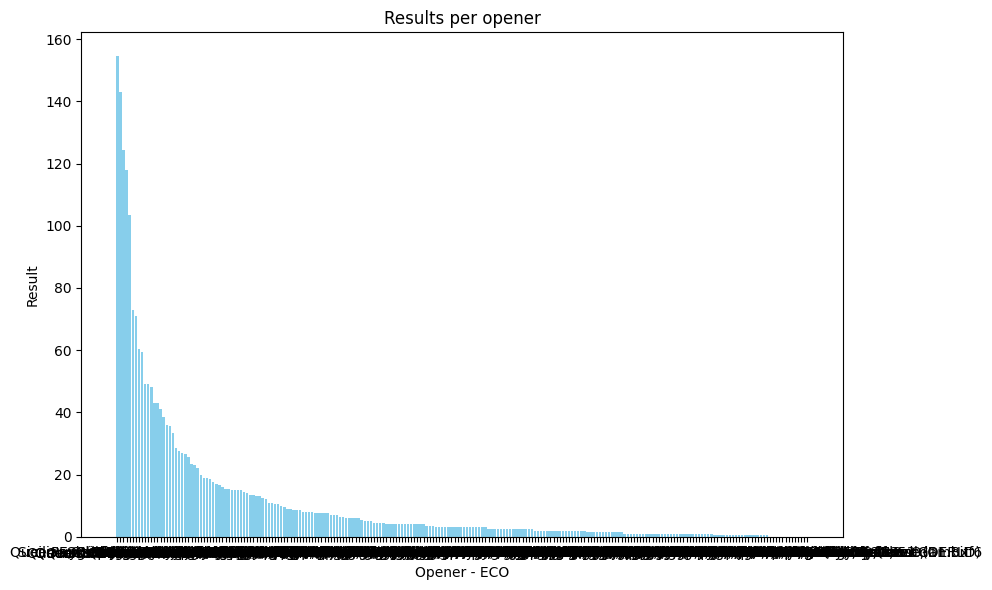

In [ ]:
# Sorting the graph DESC
sorted_games = dict(sorted(games.items(), key=lambda item: item[1], reverse=True))

import matplotlib.pyplot as plt

# Extracting ECO codes and the corresponding values after sorting
eco_codes = list(sorted_games.keys())
values = list(sorted_games.values())


plt.figure(figsize=(10, 6))
plt.bar(eco_codes, values, color='skyblue')

plt.xlabel('Opener - ECO')
plt.ylabel('Result')
plt.title('Results per opener')

plt.tight_layout()
plt.show()



We can see that we have way to many openers.

In [ ]:
# We only take a fraction of all the ECOs.

import math

fraction = math.ceil(len(sorted_games) * 0.2)

top_half_games = dict(list(sorted_games.items())[:fraction])

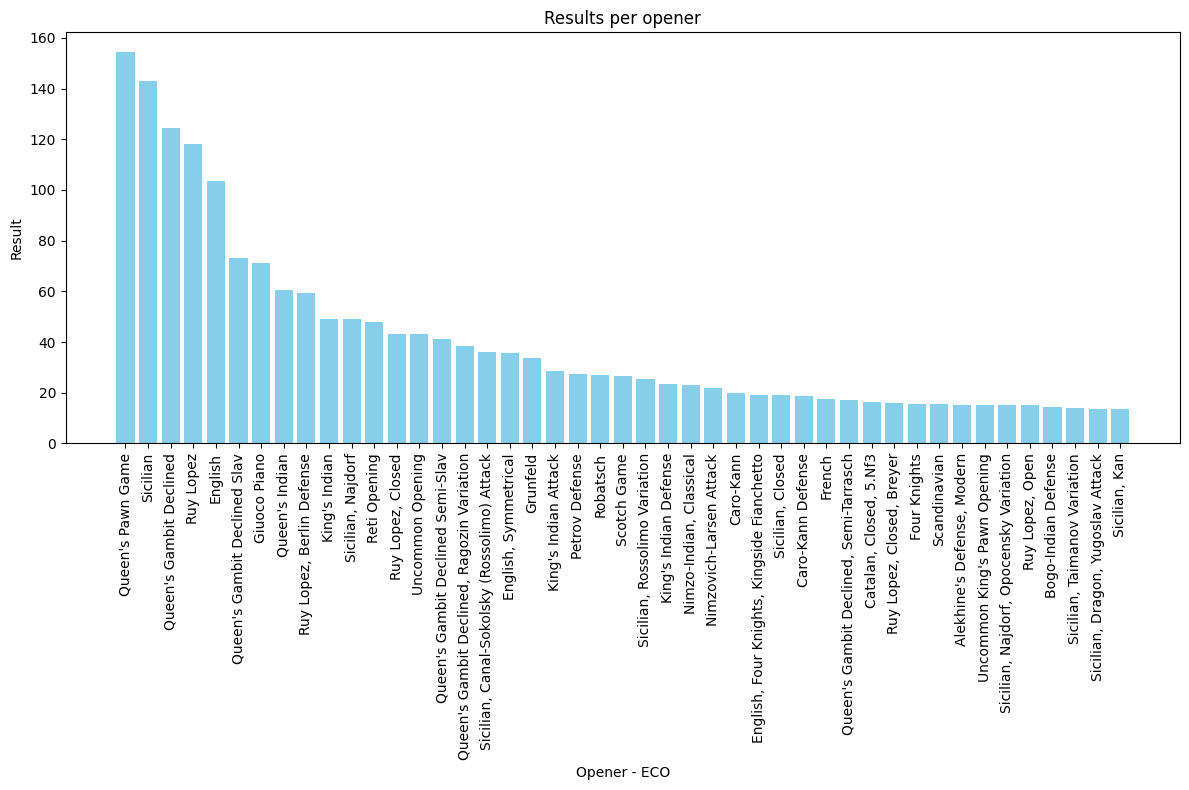

In [ ]:
# Only take the top of what we want.
eco_codes = list(top_half_games.keys())
values = list(top_half_games.values())


plt.figure(figsize=(12, 8))  
plt.bar(eco_codes, values, color='skyblue')

plt.xlabel('Opener - ECO')
plt.ylabel('Result')
plt.title('Results per opener')
plt.xticks(rotation=90)  # Rotate for better readability

plt.tight_layout()
plt.show()


**Conclusion**  
From this we can determine that if we want to play chess at a professional level, using:  
- Queen's Pawn Game  
- The Sicilia  
- Queen's Gambit Declined or  
- Ruy Lopez
  
is a good way to win.